### does REINFORCE with a neural network benefit from experience replay?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from utils import *
from collections import namedtuple

import torch as tr
import gym

%load_ext autoreload
%autoreload 2

In [2]:
def experiment(nseeds,neps,kw):
  """
  interactrion logic
  a < agent(s,h)
  s',r  < env (a)
  
  """
  metric = np.zeros((nseeds,neps))
  # loop over seeds
  for s in range(nseeds):
    np.random.seed(s)
    tr.manual_seed(s)
    # setup
    agent = REINFORCE()
    task = Task(task_name='CartPole-v1',max_ep_len=1000)
    for e in range(neps):
      ## score on greedy policy
      traj = task.play_ep(pi=agent.act)
      expD = unpack_expL(traj)
      metric[s,e] = np.sum(expD['reward'])
      agent.update(expD)
  return metric

# experiment(2,20,kw=None)

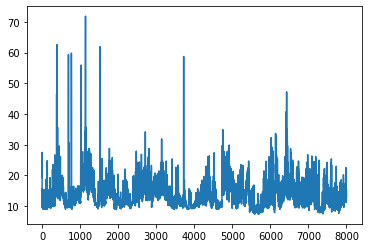

In [3]:
ns,ne = 10,8000
metric = experiment(ns,ne,kw=None)
plt.plot(metric.mean(0))